# **Next Word Prediction** 
# **LGMVIP Data Science October Internship Advance Level Task 2**
# **By Sachin Sarkar** 
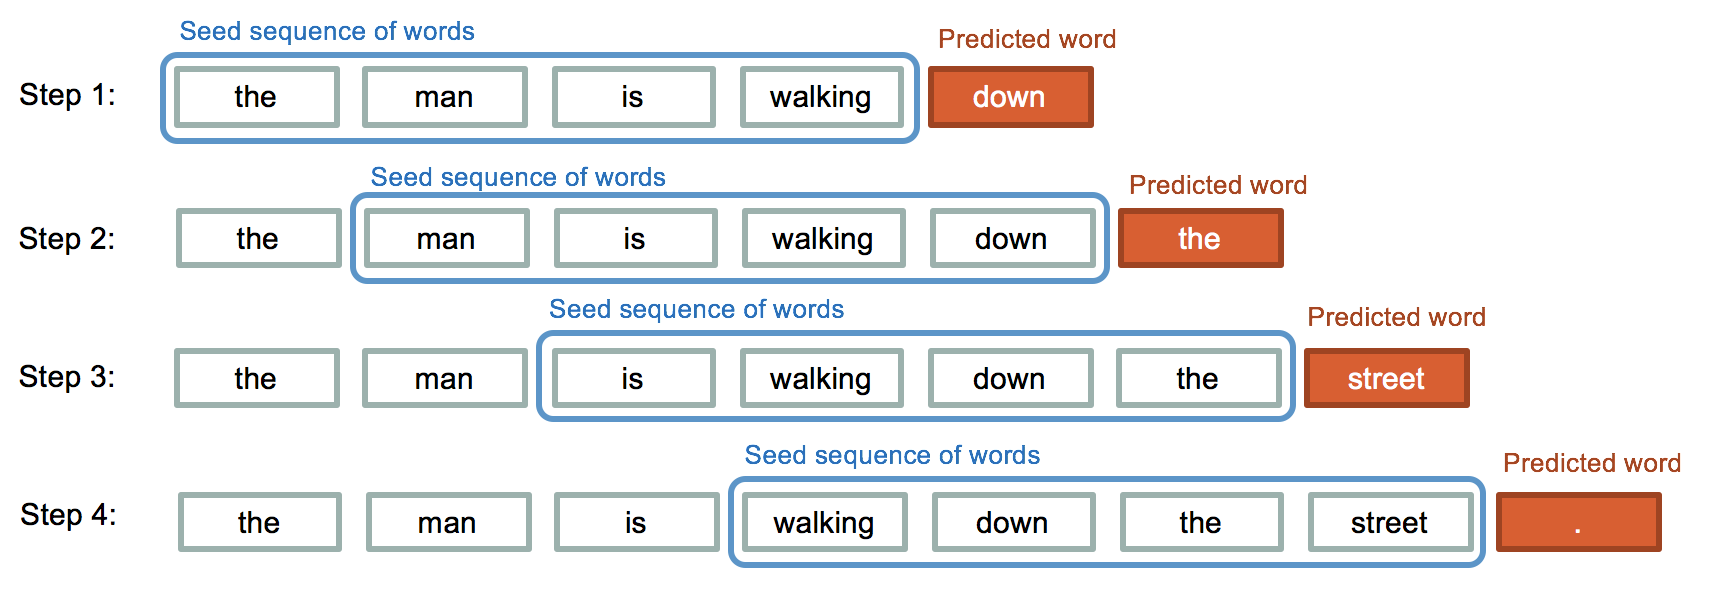

### **AIM : Developing a Recurrent Neural network that can predict next words.**




#### **Mounting to Google Dirve**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing All Necessary Packages**

In [2]:
import re, PIL
import numpy as np
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers

#### **Getting the text file and cleaning it**

In [3]:
text = open('/content/drive/MyDrive/datasets/corpus.txt','r').read()
new_text = []
for word in text.split():
    new_text.append(re.sub('[^a-zA-Z]','',word.replace("\n", "")).lower())
new_text = ' '.join(new_text)[1112:-18159]

#### **Visualzing the texts as Wordcloud**

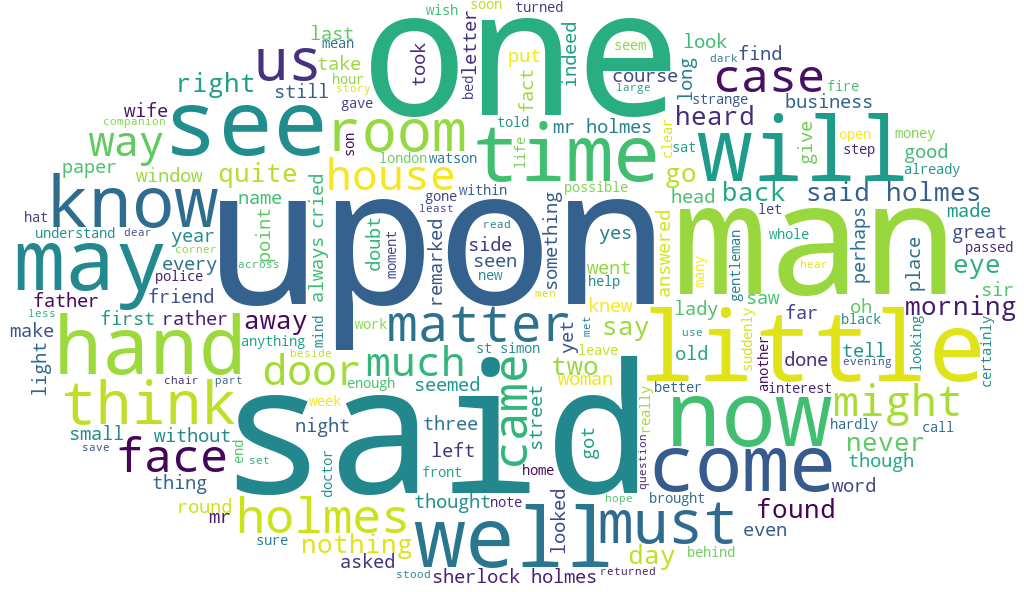

In [4]:
mask = np.array(PIL.Image.open('/content/phploeBuh.png'))
wc.WordCloud(background_color='white',mask=mask).generate(new_text).to_image()

#### **Tokenization and Text to Sequence Transformation**

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_text.split())
words_sequences = tokenizer.texts_to_sequences(new_text.split())
words_sequences = np.array(words_sequences).reshape(104286,)
print('\nTotal number of words found :',words_sequences.shape[0])


Total number of words found : 104286


#### **Preparing the Dataset**

In [6]:
word_stamps = 10
x = []
y = []
for i in range(words_sequences.shape[0]-word_stamps):
    x.append(words_sequences[i:i+word_stamps])
    y.append(words_sequences[i+word_stamps])
x = np.array(x)
y = np.array(y)
print('\nTotal number of samples in Dataset :',x.shape[0])
print('Number of words per sample :',x.shape[1])


Total number of samples in Dataset : 104276
Number of words per sample : 10


#### **Categorical Encoding**

In [7]:
y = to_categorical(y)
print('\nTotal number of vocab founds :',y.shape[1])


Total number of vocab founds : 8322


#### **Spliting dataset for Training and Testing**

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=34)
print('\nTotal number of samples in the Train Dataset :',xtrain.shape[0])
print('Total number of samples in the Test Dataset :',xtest.shape[0])


Total number of samples in the Train Dataset : 83420
Total number of samples in the Test Dataset : 20856


#### **Building the Model**

In [9]:
model = Sequential(
                        [
                            # Word Embedding Layer
                            layers.Embedding(input_dim=8322,output_dim=100,input_shape=(10,)),
                         
                            # LSTM RNN Layers
                            layers.LSTM(100,return_sequences=True,activation='tanh'),
                            layers.Dropout(0.1),
                            layers.LSTM(100,return_sequences=True,activation='tanh'),
                            layers.Dropout(0.1),
                            layers.LSTM(100,return_sequences=True,activation='tanh'),
                            layers.Dropout(0.1),
                            layers.LSTM(100,return_sequences=True,activation='tanh'),
                            layers.Dropout(0.05),
                            layers.LSTM(100,return_sequences=True,activation='tanh'),
                            layers.Dropout(0.05),
                         
                            # Flattening the data
                            layers.Flatten(),
                         
                            # Dense Layer 
                            layers.Dense(8322,activation='softmax')
                        ]
                  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           832200    
_________________________________________________________________
lstm (LSTM)                  (None, 10, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 100)           0

#### **Training The Model**

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
2607/2607 [==============================] - 125s 45ms/step - loss: 6.6228 - accuracy: 0.0534 - val_loss: 6.5361 - val_accuracy: 0.0532
Epoch 2/10
2607/2607 [==============================] - 107s 41ms/step - loss: 6.2436 - accuracy: 0.0687 - val_loss: 6.0869 - val_accuracy: 0.0872
Epoch 3/10
2607/2607 [==============================] - 107s 41ms/step - loss: 5.7943 - accuracy: 0.0947 - val_loss: 5.9844 - val_accuracy: 0.0974
Epoch 4/10
2607/2607 [==============================] - 113s 44ms/step - loss: 5.4833 - accuracy: 0.1091 - val_loss: 5.9337 - val_accuracy: 0.1079
Epoch 5/10
2607/2607 [==============================] - 113s 43ms/step - loss: 5.1446 - accuracy: 0.1195 - val_loss: 6.0502 - val_accuracy: 0.1117
Epoch 6/10
2607/2607 [==============================] - 106s 41ms/step - loss: 4.7491 - accuracy: 0.1290 - val_loss: 6.2202 - val_accuracy: 0.1069
Epoch 7/10
2607/2607 [==============================] - 106s 41ms/step - loss: 4.2756 - accuracy: 0.1573 - val_loss: 6

#### **Analysis of Training History**

In [11]:
training_history = training.history
training_history['epochs'] = range(1,11)
training_history = pd.DataFrame(training_history)
print('\nLoss and Accuracy History per Epochs :')
training_history


Loss and Accuracy History per Epochs :


,loss,accuracy,val_loss,val_accuracy,epochs
0,6.622844,0.053440,6.536129,0.053174,1
1,6.243562,0.068725,6.086852,0.087217,2
2,5.794298,0.094702,5.984383,0.097382,3
3,5.483289,0.109123,5.933740,0.107931,4
4,5.144577,0.119456,6.050224,0.111718,5
5,4.749061,0.129010,6.220160,0.106876,6
6,4.275593,0.157324,6.460695,0.101554,7
7,3.780001,0.213474,6.787787,0.095752,8
8,3.342930,0.268185,7.024680,0.094217,9
9,2.978875,0.323795,7.308322,0.080984,10


#### **Visualization of Training History**

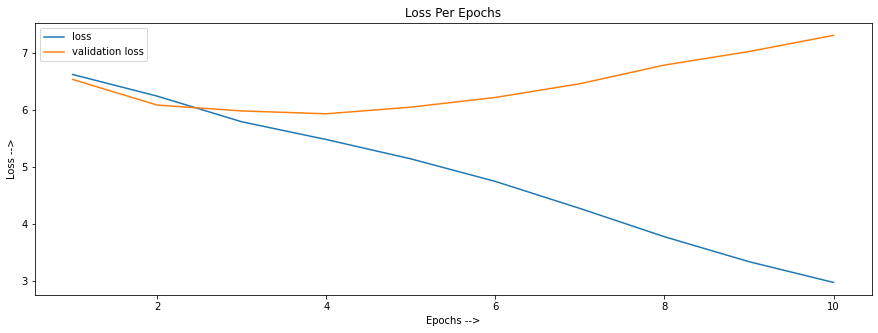

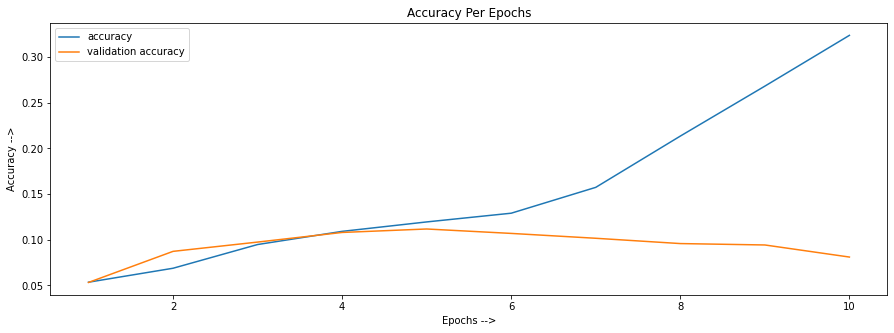

In [12]:
plt.figure(figsize=(15,5))
plt.plot(training_history['epochs'],training_history['loss'])
plt.plot(training_history['epochs'],training_history['val_loss'])
plt.legend(['loss','validation loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs -->')
plt.ylabel('Loss -->')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(training_history['epochs'],training_history['accuracy'])
plt.plot(training_history['epochs'],training_history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs -->')
plt.ylabel('Accuracy -->')
plt.show()

#### **Defining the function that returns next words**

In [13]:
def predict_next_words(text,n_words=5):
    word_stamps = 10
    if len(text.split()) < 10:
        return print('Error!. Unable to predict with limited words. Please try with more words.')
    new_text = []
    for word in text.split():
        new_text.append(re.sub('[^a-zA-Z]','',word.replace("\n", "")).lower())
    tokens = np.array(tokenizer.texts_to_sequences(new_text)).reshape(np.array(new_text).shape[0],)
    tokens = list(tokens)
    next_words = []
    for i in range(n_words):
        prediction = np.argmax(model.predict(np.array([tokens[-10:]])))
        tokens.append(prediction)
        next_word = tokenizer.sequences_to_texts([[prediction]])[0]
        next_words.append(next_word)        
    return ' '.join(next_words)

#### **Testing the Function and Predicton of next Words**

In [15]:
text = '''It was an old rickety door and gave at once before our united strength. Together we rushed into'''

print('\nNext predicted words :', predict_next_words(text,n_words=10))


Next predicted words : the lodge of the garden and drove at the case


#### **Saving the Model**

In [16]:
model.save('next_word_prediction_model.h5')

#  **Thank You**